<a href="https://colab.research.google.com/github/Ygor-m/Desafio_4/blob/main/Dnc__Desafio_4_Ygor_Morais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Desafio 4- Construindo um modelo de regressão linear para marketing**

Autor: Ygor Morais Guimarães

**1- Análise Descritiva**

**1.1 Contexto e Objetivo da Empresa:**

Uma empresa está investindo mensalmente em plataformas de publicidade, como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos.

Para entender melhor a relação entre as variáveis presentes nesses registros e identificar os fatores que mais impactam na geração de leads, a empresa solicitou a análise de um especialista em dados. Além disso, a empresa busca criar um modelo de predição de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.

In [ ]:
#Importação das bibliotecas

from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
upload = files.upload()

Saving MKT.csv to MKT.csv


In [ ]:
#Criação do Dataframe
df = pd.read_csv("MKT.csv")

In [ ]:
#Verificação dos primeiros dados
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
df.info()
print('----------------------------------------')
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB
----------------------------------------


youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [ ]:
#Verificação dos dados nulos e/ou duplicados
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
#Análise das variáveis estatísticas
round(df.describe(), 2)

,youtube,facebook,newspaper,sales
count,171.00,171.00,171.00,171.00
mean,178.02,27.67,35.24,16.92
std,102.45,17.91,24.90,6.31
min,0.84,0.00,0.36,1.92
25%,91.08,11.70,13.74,12.54
50%,179.76,26.76,31.08,15.48
75%,262.98,43.68,50.88,20.82
max,355.68,59.52,121.08,32.40


In [ ]:
#Cálculo do total de cada coluna
df_total = pd.DataFrame({"Tipo": df.columns, "Total": df.sum()})
df_total.reset_index(inplace=True)
df_total = df_total[["Tipo","Total"]]
df_total

,Tipo,Total
0,youtube,30441.60
1,facebook,4731.84
2,newspaper,6026.04
3,sales,2893.80


Text(0.5, 1.0, 'Investimento x Vendas')

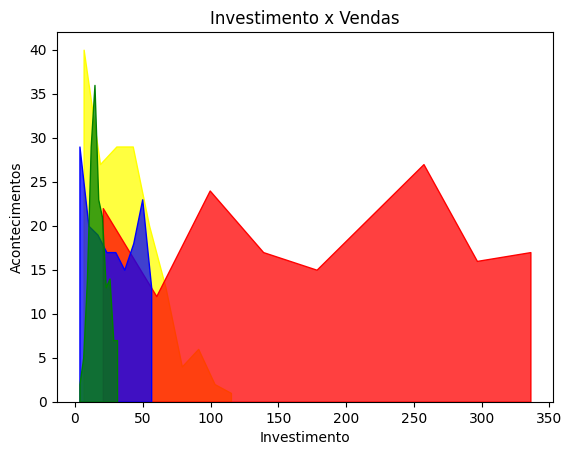

In [ ]:
#Montagem dos Gráficos e Análise dos Histogramas
sns.histplot(data=df, x="newspaper", color="yellow", element="poly")
sns.histplot(data=df, x= "youtube", color="red", element="poly")
sns.histplot(data=df, x= "facebook", color="blue", element="poly")
sns.histplot(data=df, x= "sales", color="green", element="poly")
plt.ylabel("Acontecimentos")
plt.xlabel("Investimento")
plt.title("Investimento x Vendas")


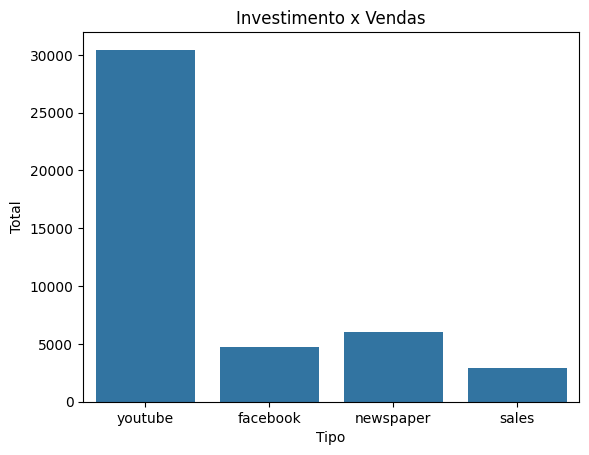

In [ ]:
#Montagem do Gráfico Total por Coluna (Barras)
sns.barplot(data=df_total, x="Tipo", y="Total");
plt.title("Investimento x Vendas");

**2- Análise Exploratória**

In [ ]:
#Tratamento e construção dos Dados
df_alt = df
df_alt['investimento'] = df_alt['youtube'] + df_alt['facebook'] + df_alt['newspaper']
df_alt.head()

,youtube,facebook,newspaper,sales,investimento
0,84.72,19.20,48.96,12.60,152.88
1,351.48,33.96,51.84,25.68,437.28
2,135.48,20.88,46.32,14.28,202.68
3,116.64,1.80,36.00,11.52,154.44
4,318.72,24.00,0.36,20.88,343.08


In [ ]:
# Atualizando o dataframe
df_total = pd.DataFrame({'Tipo': df_alt.columns, 'Total': df_alt.sum()})
df_total.reset_index(inplace=True)
df_total = df_total[['Tipo', 'Total']]
df_total

,Tipo,Total
0,youtube,30441.60
1,facebook,4731.84
2,newspaper,6026.04
3,sales,2893.80
4,investimento,41199.48


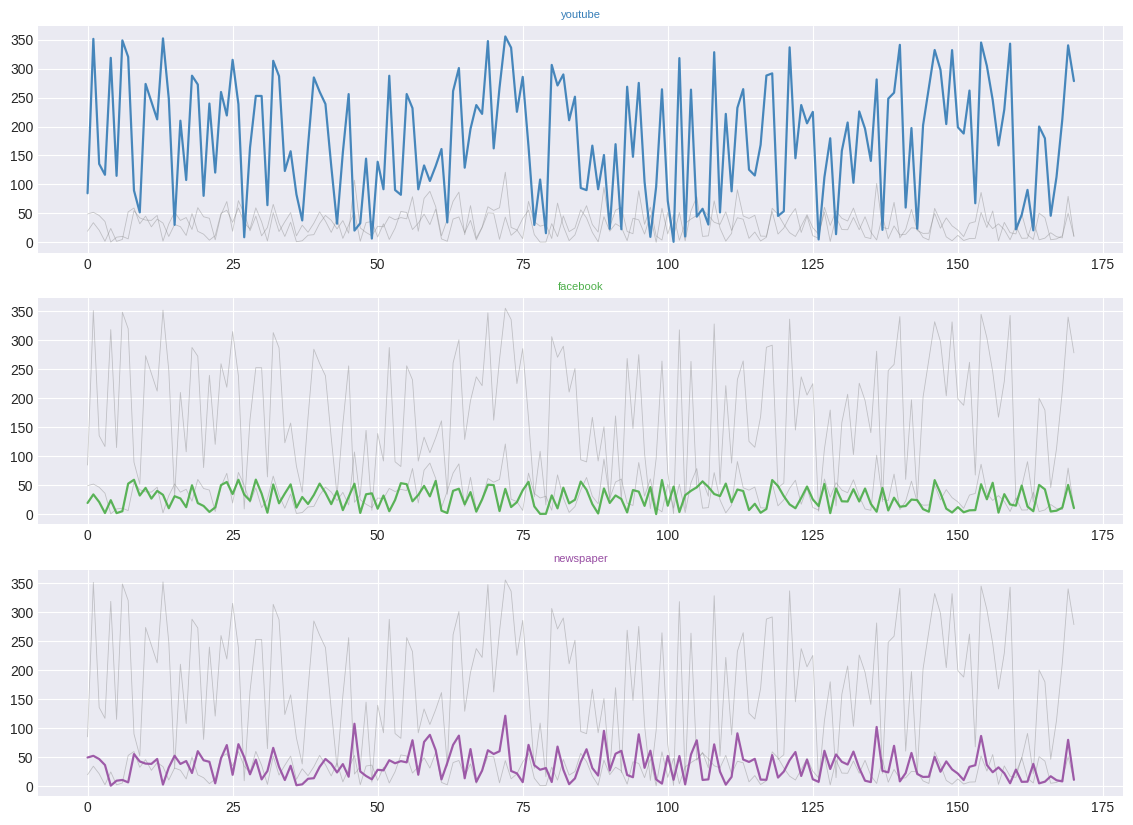

In [ ]:
#Criação de um gráfico de linha, para análise dos investimentos
multi = df_alt[["youtube", "facebook", "newspaper"]]
plt.figure(figsize=(14,10))
plt.style.use("seaborn-v0_8-darkgrid")
palette= plt.get_cmap("Set1")
num = 0
for col in multi:
  num += 1
  plt.subplot(3, 1, num)
  for v in multi:
    plt.plot(multi.index, multi[v], marker='', color="grey", linewidth =0.6, alpha = 0.4)
  plt.plot(multi.index, multi[col], marker='', color=palette(num), linewidth=1.6, alpha=0.9, label=col)
  plt.title(col, loc="center", fontsize=8, fontweight=0, color=palette(num))
plt.show();

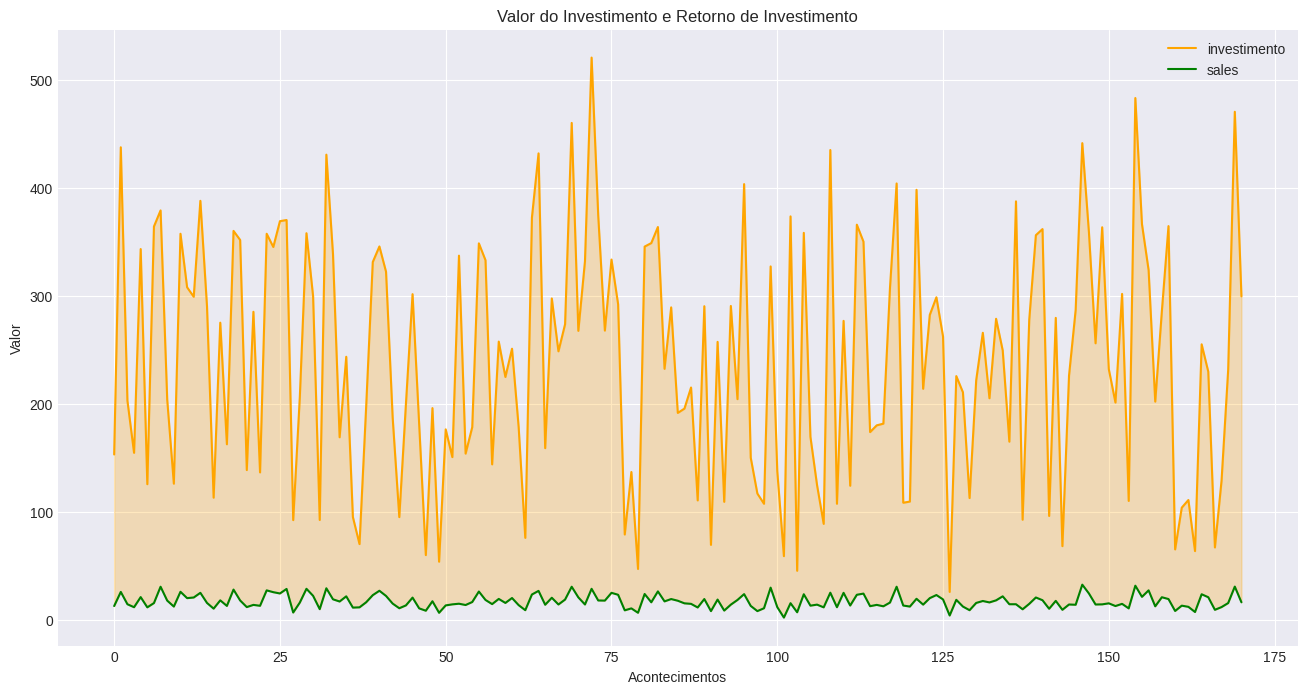

In [ ]:
#Criando um novo gráfico de linhas para análise
fig, ay = plt.subplots(figsize=(16, 8))
sns.lineplot(data=df_alt, x=df_alt.index, y='investimento', color='orange', label='investimento')
sns.lineplot(data=df_alt, x=df_alt.index, y='sales', color='green', label='sales')
ay.fill_between(
    df_alt.index, df_alt['investimento'], df_alt['sales'],
    where=(df_alt['investimento'] > df_alt['sales']),
    interpolate=True, color='orange', alpha=0.25
    )
ay.fill_between(
    df_alt.index, df_alt['investimento'], df_alt['sales'],
    where=(df_alt['investimento'] < df_alt['sales']),
    interpolate=True, color='green', alpha=0.25
    )
ay.legend()
plt.xlabel('Acontecimentos')
plt.ylabel('Valor')
plt.title("Valor do Investimento e Retorno de Investimento");

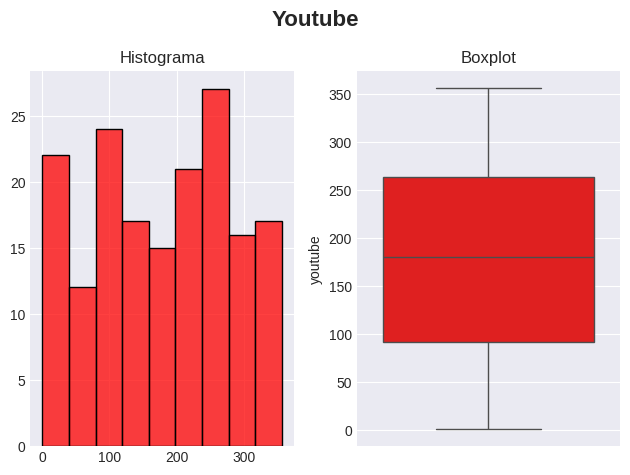

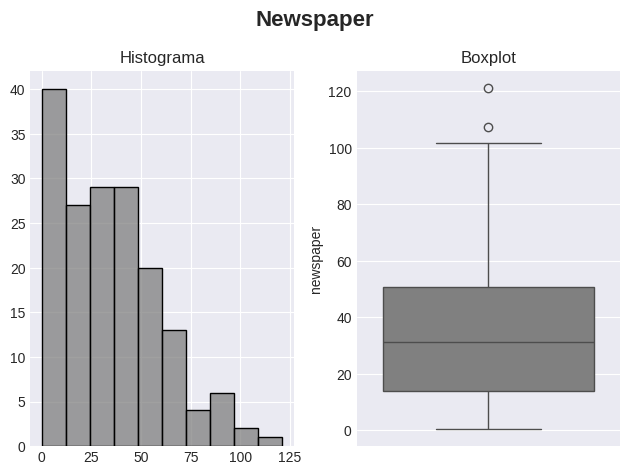

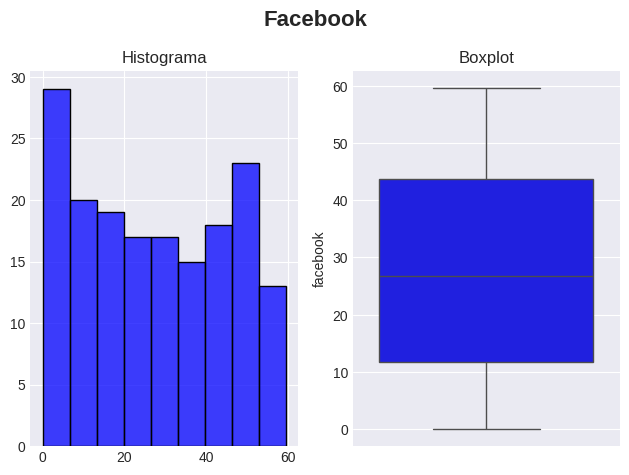

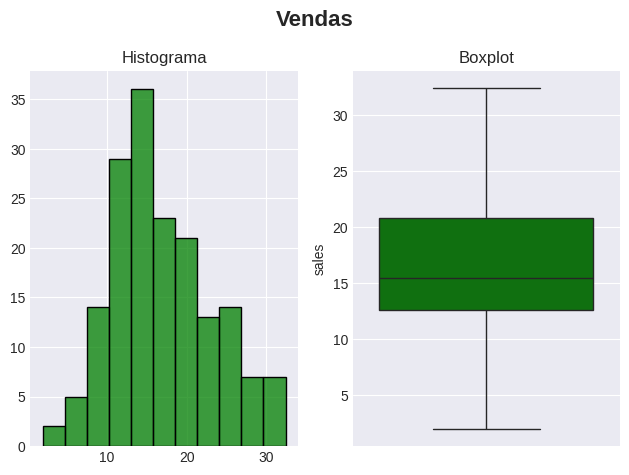

In [ ]:
#Visando uma melhor análise, faz-se necessário um histograma do Youtube, Newspaper, Facebook e Sales e um boxplot separadamente.
plt.subplot(121)
sns.histplot(df["youtube"], color="red")
plt.title("Histograma")
plt.xlabel("")
plt.ylabel("")
plt.subplot(122)
sns.boxplot(df["youtube"], color="red")
plt.title("Boxplot")
plt.xlabel("")
plt.suptitle('Youtube',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

plt.subplot(121)
sns.histplot(df["newspaper"], color="grey")
plt.title("Histograma")
plt.xlabel("")
plt.ylabel("")
plt.subplot(122)
sns.boxplot(df["newspaper"], color="grey")
plt.title("Boxplot")
plt.xlabel("")
plt.suptitle('Newspaper',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

plt.subplot(121)
sns.histplot(df["facebook"], color="blue")
plt.title("Histograma")
plt.xlabel("")
plt.ylabel("")
plt.subplot(122)
sns.boxplot(df["facebook"], color="blue")
plt.title("Boxplot")
plt.xlabel("")
plt.suptitle('Facebook',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

plt.subplot(121)
sns.histplot(df["sales"], color="green")
plt.title("Histograma")
plt.xlabel("")
plt.ylabel("")
plt.subplot(122)
sns.boxplot(df["sales"], color="green")
plt.title("Boxplot")
plt.xlabel("")
plt.suptitle('Vendas',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

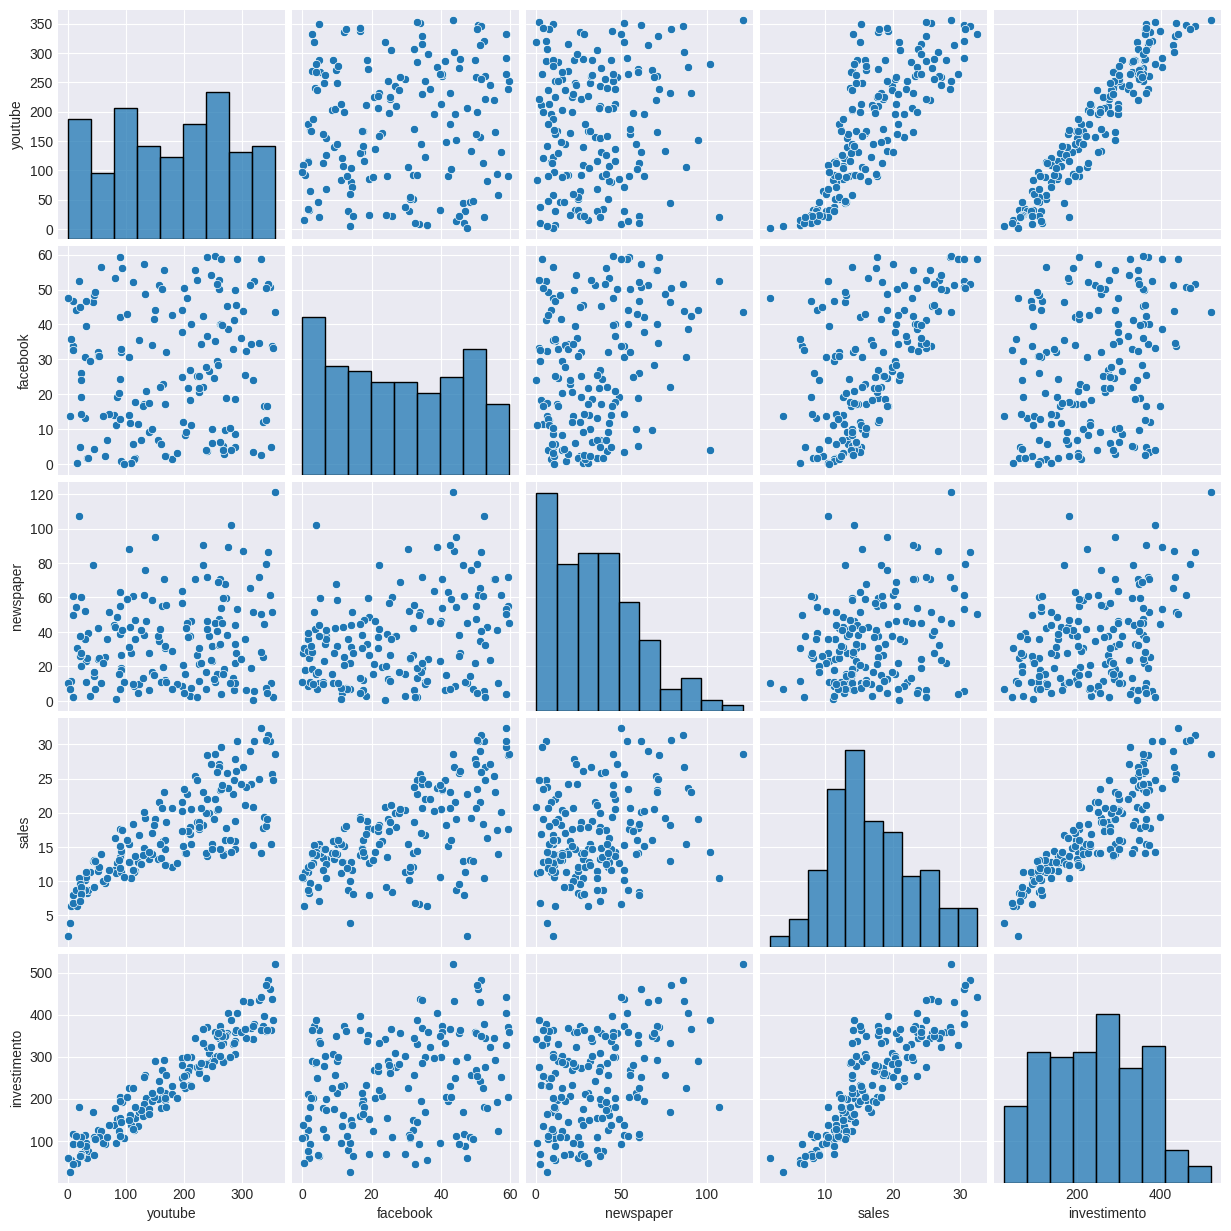

In [ ]:
#Plotagem de um Pairplot, para análise inicial da regressão.
sns.pairplot(df)

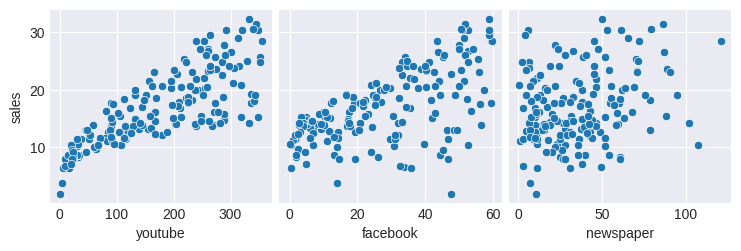

In [ ]:
#Separando os gráficos de interesse do pairplot.
sns.pairplot(df,x_vars=['youtube', 'facebook', 'newspaper'], y_vars='sales');

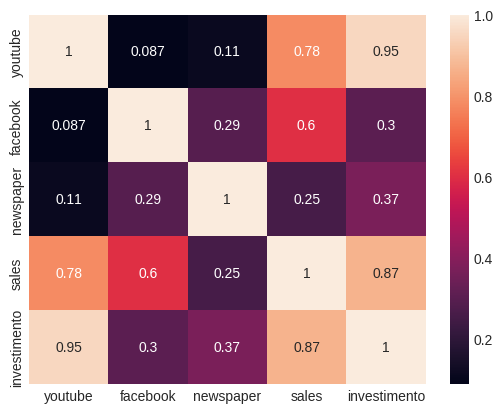

In [ ]:
#Analisando a correlação desses valores:
sns.heatmap(df.corr(), annot=True);

#Observa-se a existência de uma correlação positiva bem relevante entre vendas e investimento nas plataformas Youtube e Facebook.
#Isso indica que um investimento maior em publicidade nestas plataformas tende a gerar mais retorno em vendas.

**3- Modelagem**

In [ ]:
# Criação das bases e treino e teste, analisando o modelo
y = df[['sales']]
X = df.drop(columns=['sales'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Plotagem das bases criadas
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(136, 4)
(35, 4)
(136, 1)
(35, 1)


In [ ]:
#Criação do Modelo de Regressão.
reg = LinearRegression()

In [ ]:
#Treinamento do modelo
modelo_reg= reg.fit(X_train, y_train)

**4- Cálculo da Predição**

In [ ]:
#Cálculo do r^2
print('r^2 é', modelo_reg.score(X_test, y_test))

## O valor de r^2 é relativamento alto, indicando a variação dos dados em torno da sua média.

r^2 é 0.8728630857012161


In [ ]:
#Cálculo da predição
y_pred = modelo_reg.predict(X_test)

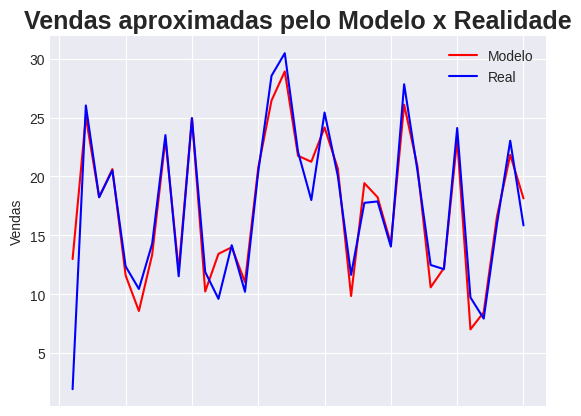

In [ ]:
#Plotagem comparativa entre o modelo e o que se verifica na realidade

c = [i for i in range(1, 36, 1)]
plt.plot(c, y_pred, color="red", label="Modelo")
plt.plot(c, y_test, color="blue", label="Real")
plt.title("Vendas aproximadas pelo Modelo x Realidade",fontsize=18, fontweight='bold')
plt.ylabel("Vendas")
plt.tick_params(labelbottom = False, bottom = False)
plt.legend()
plt.show()

## Analisando o gráfico, infere-se, que o modelo demonstrou estimativas com grau alto de precisão, com base nos seus testes.